# Fourier analysis

<img src="https://insightincmiami.org/wp-content/uploads/2019/06/fourier-transform-visualized.jpg" alt="Fourier transfroms" ALIGN="right" style="width: 400px;"/>

### Aim:
Use fourier analysis to extract the oscilation frequencies of a beating double pendulum.\
*No physics knowledge required.*

### Data file requirements:
*BeatingData.txt*  
*GlassBottle.wav*  
*BigBen.wav*

### Non-anaconda python libaries:
None

### Prerequisites:
* Basics
* Plotting
* Experimental data (for context)

### Primary Outcomes:
* Perform Fourier ananlysis

### Secondary Outcomes:
* Understanding of fourier transforms
* Importing audio (.wav) files

## Background:
Fourier analysis is the act of using fourier transforms to get useful information out for data. If your data involves waves or is periodic in any way its often worth trying out fourier analysis. 


# Doing the transform

In [1]:
#First we import a few packages we will need 
import numpy as np               # for dealing with math
import pandas as pd              # for tables
import scipy as sp
import matplotlib.pyplot as plt  # for plotting
%matplotlib inline

import time
import scipy.fftpack

In [2]:
# Import data
dataTable = pd.read_csv('BeatingData.txt',index_col=0) # Reading our data
dataTable # printing the table

,time,voltage
0,0.00,-0.252834
1,0.01,-0.253834
2,0.02,-0.251781
3,0.03,-0.247834
4,0.04,-0.245834
...,...,...
8956,89.56,0.188166
8957,89.57,0.185737
8958,89.58,0.185166
8959,89.59,0.184008


In [3]:
# Prepare data for fourier transform
my_signal = dataTable.voltage.to_numpy()

In [4]:
# Perform transform
fftsignal = sp.fftpack.fft(my_signal) # Doing the fourer transform

C:\Users\z5074933\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


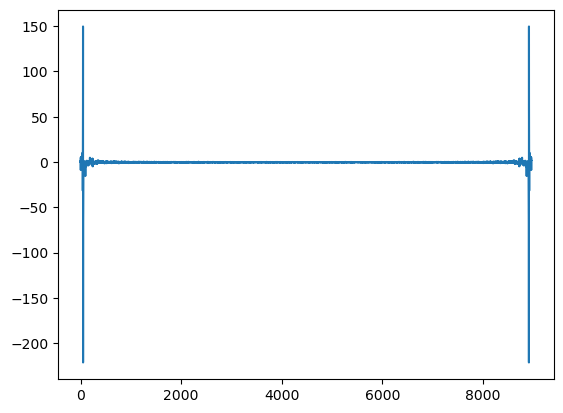

In [5]:
plt.plot(fftsignal)

A few issues:
* We are getting an error saying we are using complex values
* The x-axis is arbitrary using where we want frequency
* It looks like our data is duplicated and mirrored

To fix the first issue lets have a look at our data.

In [6]:
print(fftsignal[0:5])

[2.05000000e-04-0.j         2.13195317e+00+1.2026765j
 2.36010998e+00-0.00594156j 2.26434332e+00-0.6181362j
 9.86458952e-01-0.85473478j]


The j in each number is the imaginary unit (also known as $i$ or $\sqrt{-1}$). We can throw out the imaginary and negative parts by taking the absolute value of the fourier transformed signal.

In [7]:
# The complex numbers can be removed by performing an absolute value
fftsignal = np.abs(fftsignal)

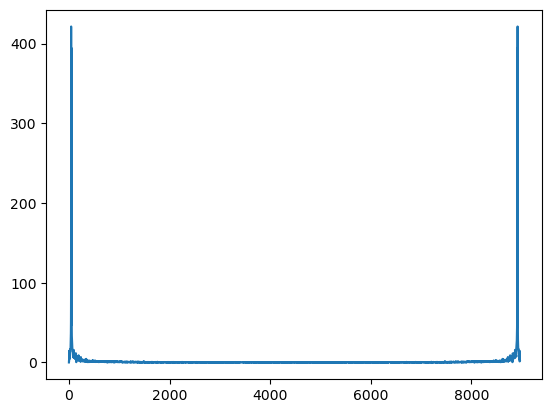

In [8]:
plt.plot(fftsignal)

Next issue is our x-axis. To generate our frequency axis we will use the built in fftfreq function which requires knowledge of the timestep of our original data and the total number of data points. 

In [9]:
timestep = 0.01 # This can be seen by looking our data's time column
steps = len(dataTable.time) # The number of data points

In [10]:
# Using fftfreq tp generat the x-axis, refered to as the frequency base
freqbase = sp.fftpack.fftfreq(steps, d=timestep)
# Remeber d = the period between times, not the sampling frequency (sample rate)

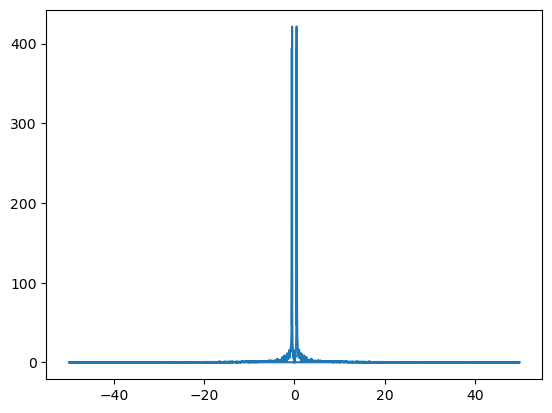

In [11]:
plt.plot(freqbase,fftsignal)

Our data is now mirrored around frequency = 0. We can remove that by taking only the second half of our data

In [12]:
fftsignal = fftsignal[:steps//2] # Step 2 - take only the second half of our fourier transform (it's mirrored about f = 0) 
freqbase = freqbase[:steps//2]

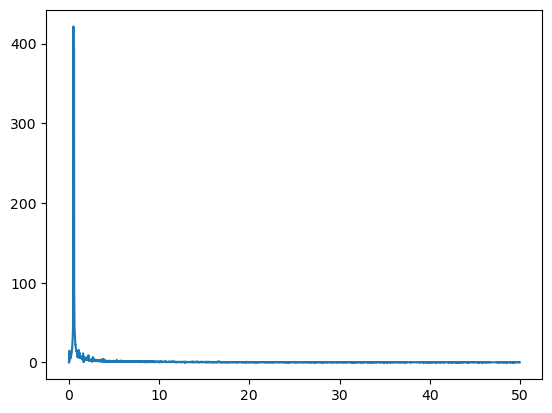

In [13]:
plt.plot(freqbase,fftsignal)

# Analysis time
Great we can now analyse our graph to see what frequencies are peaking.
First lets make the graph easier to read and zoom in a bit.

Text(0.5, 0, 'Frequency (Hz)')

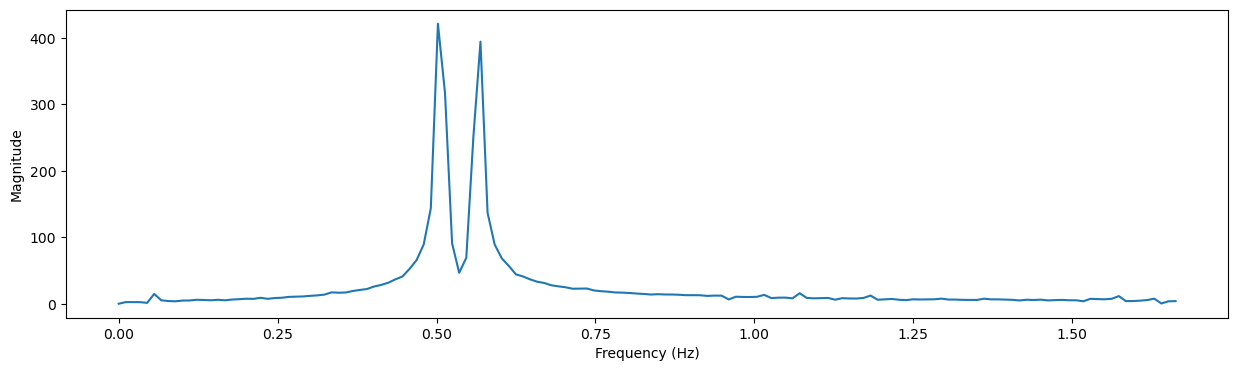

In [14]:
# Zooming in to see the peaks
plt.figure(figsize=(15, 4))
lastidx = 150 # using this to zoom in on the graph
plt.plot(freqbase[0:lastidx], fftsignal[0:lastidx])
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')

So we can visualy see we have two peaks, which we expect for beating pendula. Visually the peaks are around 0.5 and 0.6 Hz but lets find them a bit more accuratly.

Instead of using a peak finding algorithm we will instead simply sort our data by magnitude where the highest magnitude values are related to the peaks.

In [15]:
fourier = pd.DataFrame({ "Mag" : fftsignal, "Freq" : freqbase})
fourier.sort_values(by=['Mag'], ascending = False) # Finding the peaks

,Mag,Freq
45,421.418952,0.502176
51,394.490311,0.569133
46,316.985424,0.513336
50,250.984361,0.557973
44,143.784520,0.491017
...,...,...
3668,0.027432,40.932932
4330,0.017894,48.320500
3881,0.016955,43.309898
3459,0.016338,38.600603


From this we get our two peaks are at 0.50 Hz and 0.60 Hz to 2 dp

## Fun things to do with Fourier transforms

1. Inverse fourier transforms
2. 2D fourier transform
3. A combination of 1 and 2 to do fourier filtering
3. Looking at your favourite song as a spectrogram


You can also use fourier transforms to look at the spectrogram of your data or, more intrestingly, a song. 
It can be done with all the tools you have but someone has alrady done the hard work for us and turned it in to a package here https://pyspectrum.readthedocs.io/en/latest/auto_examples/plot_spectrogram.html

# Test your understanding

Try to use fourier analysis to solve the following problems

### Question 1: Resonant frequency

<img src="https://d30w0gi73sj4fc.cloudfront.net/products/image/getimage/93151?typecode=m" alt="Glass resonance" ALIGN="right" style="width: 300px;"/>

File name: GlassBottle.wav  
Data from: The sound of a glass bottle being struck.
  
Value to find: Find the resonant frequency of the glass bottle. 
  
Every object has a resonant frequency, which is the main frequency at which it will vibrate when struck. This is also the frequency that if played in front of the object will caue it to vibrate violently and in some cases shatter. This is where the idea behind singing to a wine glass to cause it to shatter comes from (and is actually possible [check out this video](https://www.youtube.com/watch?v=Oc27GxSD_bI) ).   

The following cells show how to import the wav file and how to play as audio it in jupyter (for fun).    
   
<details>
    <summary><strong>Click this text once to reveal a hint</strong></summary>
    You can condense doing the fourier transform into one cell it involves the following steps: 
    <ol>
    <li>Transforming the audio</li>
    <li>Determining the stepsize from the sample rate</li>
    <li>Generating the frequency base</li>
    <li>Taking only the part of the transformed audio and frequency base we care about (positive real section).</li>
    </ol>
</details>


In [16]:
from scipy.io import wavfile
samplerate, audio = wavfile.read('GlassBottle.wav')
time = np.arange(0,len(audio))*1/samplerate

In [17]:
from IPython.display import Audio
Audio(audio, rate=samplerate)

Plot your audio data

Fourier transform the audio

Plot the fourier transform

Determine the peak frequencies

### Question 2: The Bell, Big Ben

<img src="https://cdn.londonandpartners.com/-/media/images/london/visit/traveller-information/essential-information/when-do-the-clocks-change/big-ben-clock-change-640x360.jpg?mw=640&hash=D0BD1035355493F83B2CB54A35FAB11C64EF87DF" alt="Bigben" ALIGN="right" style="width: 350px;"/>

File name: BigBen.wav  
Data from: The chime of Big Ben.  
  
Value to find: Find the 5 strongest frequencies in the first ring of Big Ben. 
  
The following cells show how to import the wav file and how to play as audio it in jupyter (for fun).

<details>
    <summary><strong>Click this text once to reveal a level 1 hint</strong></summary>
    Remeber we only want the frequencies of the first chime not the entire audio file. Trim your data so it only has the first chime in it.
</details>

<details>
    <summary><strong>Click this text once to reveal a level 2 hint</strong></summary>
    If you can't figure out how to trim the audio file, have a look at the np.where funtion.
</details>


In [18]:
from scipy.io import wavfile
samplerate, audio = wavfile.read('BigBen.wav')
time = np.arange(0,len(audio))*1/samplerate

In [19]:
from IPython.display import Audio
Audio(audio, rate=samplerate)

Plot your audio data

Fourier transform the relevant part of the audio file

Plot the fourier transform

Determine the peak frequencies